## Load data and browse data

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
# Load data from file
df = pd.read_csv('data/churn.csv')

In [3]:
# Inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
# Browse dataset
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [7]:
# Count missing values by column
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

## Explore data

### Numeric variables

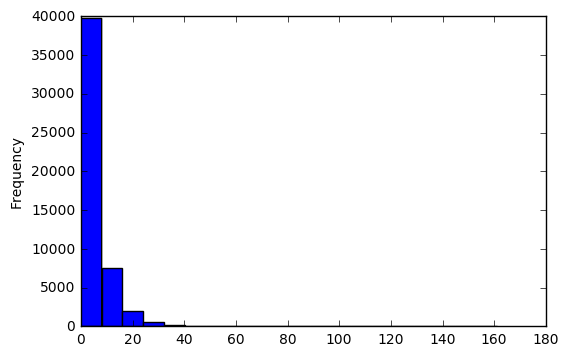

In [8]:
df['avg_dist'].plot.hist(bins=20)

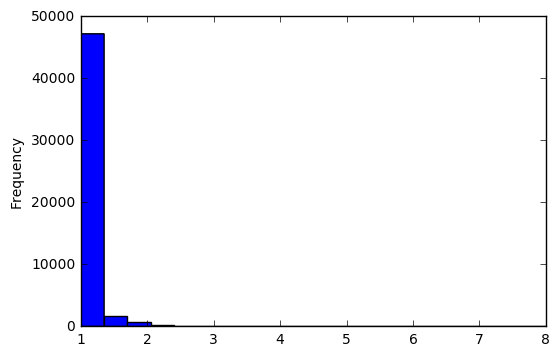

In [9]:
df['avg_surge'].plot.hist(bins=20)

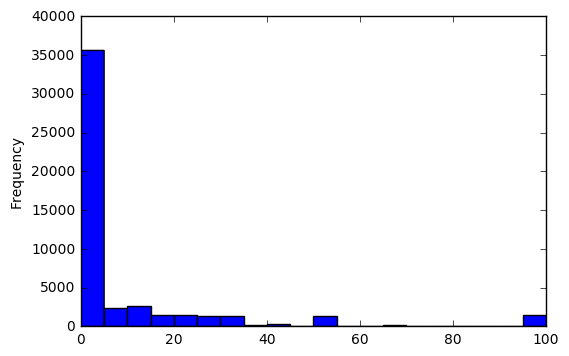

In [10]:
df['surge_pct'].plot.hist(bins=20)

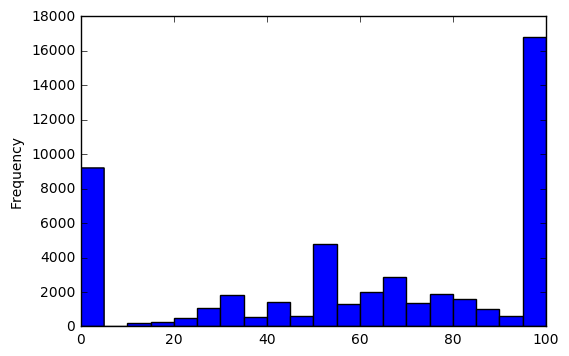

In [11]:
df['weekday_pct'].plot.hist(bins=20)

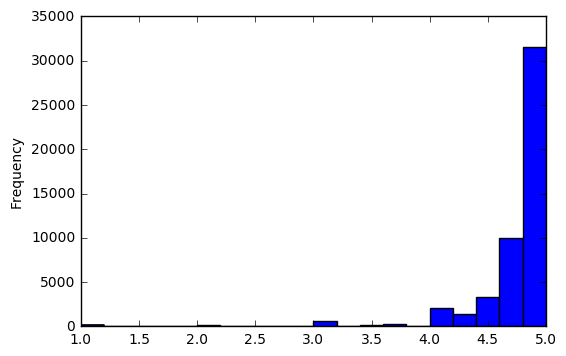

In [12]:
df['avg_rating_by_driver'].plot.hist(bins=20)

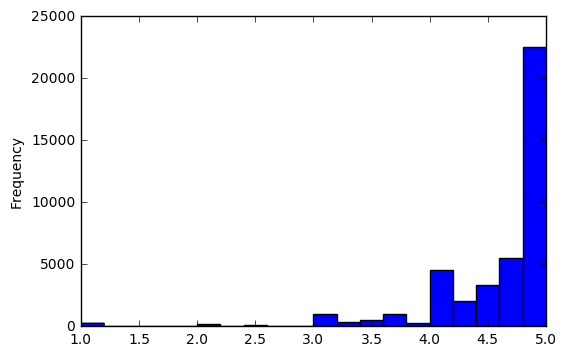

In [13]:
df['avg_rating_of_driver'].plot.hist(bins=20)

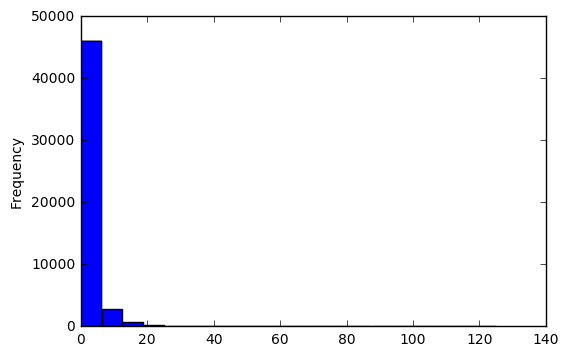

In [14]:
df['trips_in_first_30_days'].plot.hist(bins=20)

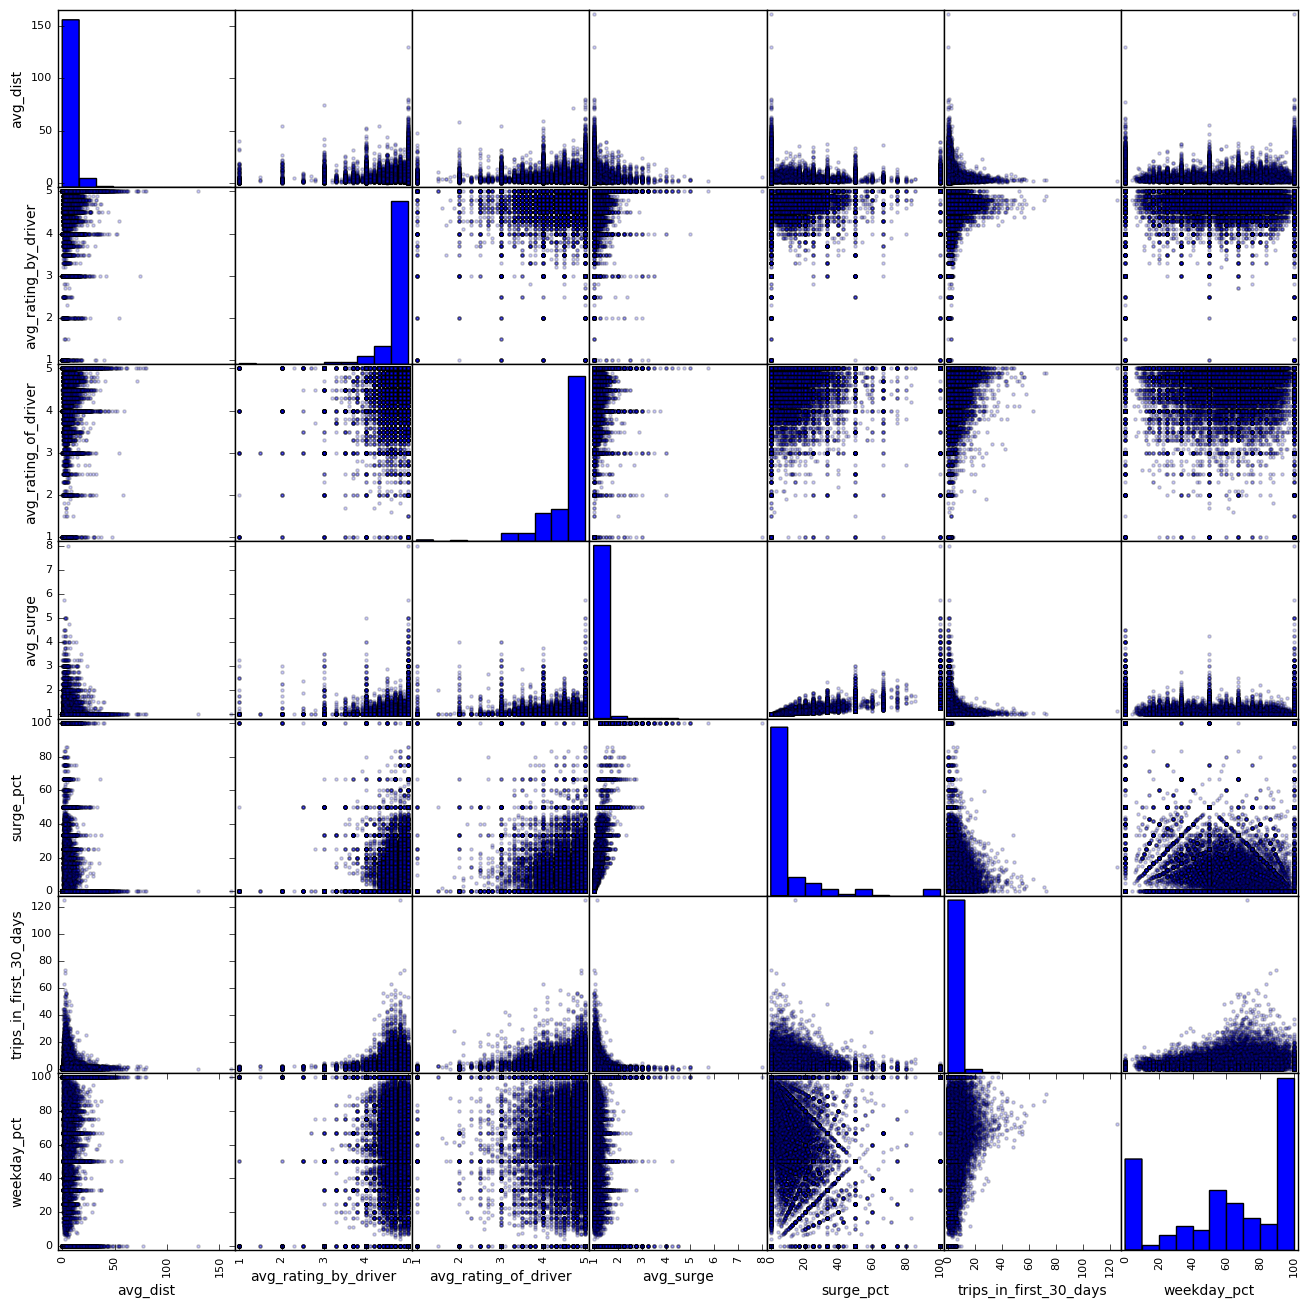

In [16]:
# # Use scatter_matrix from Pandas
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[[u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', u'surge_pct', u'trips_in_first_30_days', u'weekday_pct']],
                alpha=0.2, figsize=(16, 16), diagonal='hist')
plt.show()

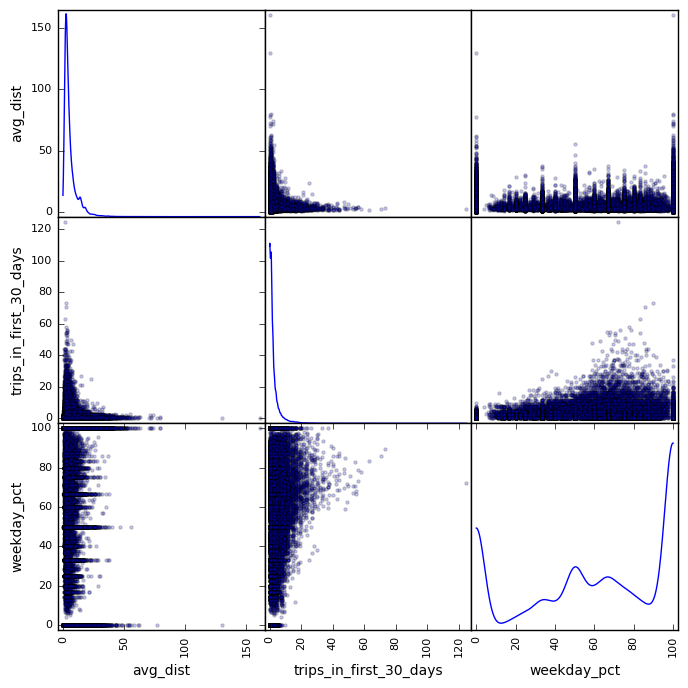

In [17]:
# # Use scatter_matrix from Pandas
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[[u'avg_dist', u'trips_in_first_30_days', u'weekday_pct']], 
               alpha=0.2, figsize=(8, 8), diagonal='kde')
plt.show()

### Categorical variables

In [18]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

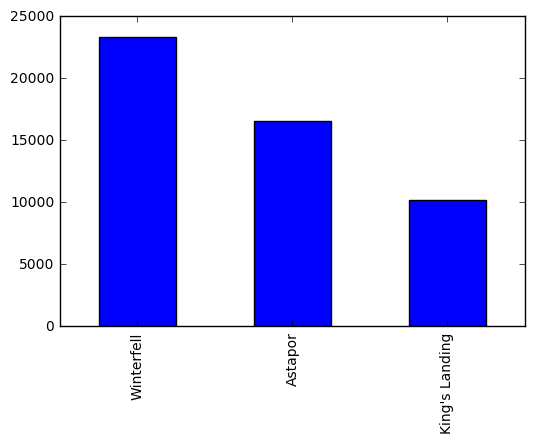

In [19]:
df['city'].value_counts().plot.bar()

In [20]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

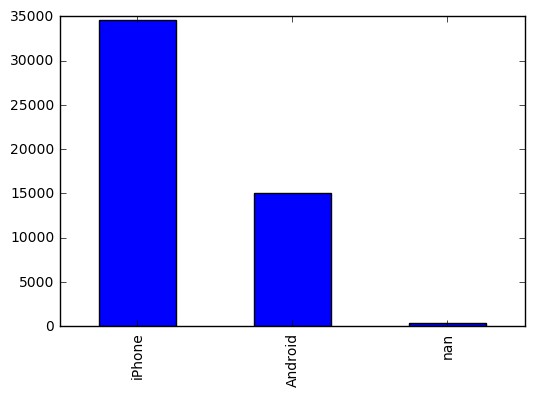

In [21]:
df['phone'].value_counts(dropna=False).plot.bar()

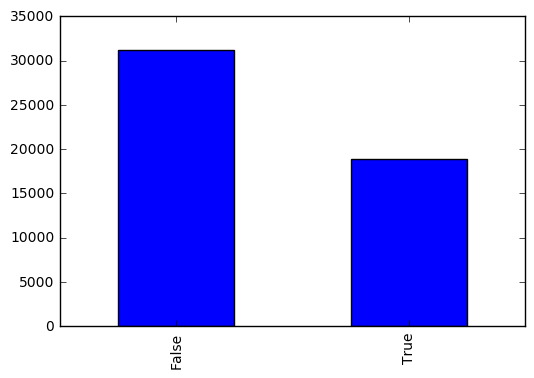

In [22]:
df['luxury_car_user'].value_counts().plot.bar()

## Clean data - dealing with missing values

In [23]:
# Count missing values by column
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

#### Option 1: drop all rows that have missing values

In [24]:
df_dropna = df.dropna(axis=0)

In [25]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
luxury_car_user           41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [26]:
df_dropna.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,8.898709,2.609675,61.254897
std,5.145174,0.404606,0.616104,0.198747,18.322061,4.059336,34.813848
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


#### Option 2: fill missing values

In [27]:
# Make a copy of df, because you don't want to mess up with orignal df when you experiment stuff
df_fillna = df.copy()

In [28]:
# Fill missing value for phone
df_fillna['phone'] = df['phone'].fillna('no_phone')

In [29]:
# Fill missing values with median
df_fillna['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median())
df_fillna['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median())

In [30]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [31]:
df_fillna.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


#### Decision
We need to decide whether we should exclude data with missing value. We need statistical tools to help us decide. 


In [32]:
# For now we will move on (to be revisited)
df = df_fillna

## Transform data

### Time-series variables

In [33]:
# convert time-series information to datetime data type
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [34]:
# construct a new df to experiment on the time-series 
df_timestamp = df[['last_trip_date', 'signup_date']].copy()

In [35]:
df_timestamp['count'] = 1

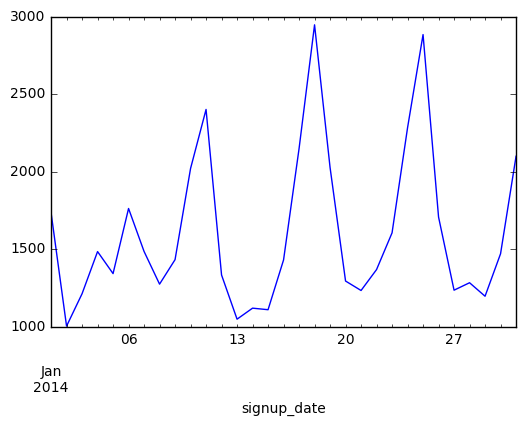

In [36]:
df_timestamp = df_timestamp.set_index('signup_date')
df_timestamp['count'].resample("1D").sum().plot()

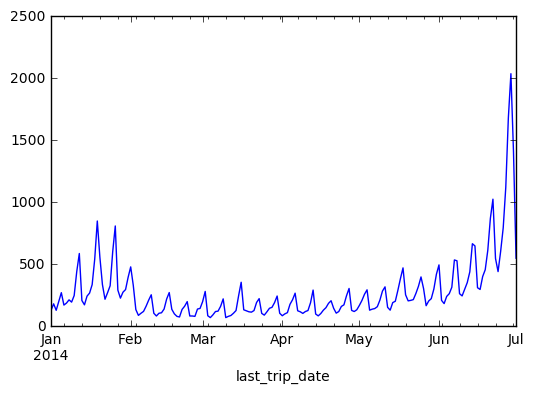

In [37]:
df_timestamp = df_timestamp.set_index('last_trip_date')
df_timestamp['count'].resample("1D").sum().plot()

In [39]:
# Experiment block
date_in_string = '2014-06-01'
date_in_datetime = pd.to_datetime(date_in_string)
print (date_in_datetime)
print (date_in_datetime.dayofweek)

2014-06-01 00:00:00
6


In [42]:
# There might be some signal from day of week when a user signed up Uber, so create a column for that
df['signup_dow'] = df['signup_date'].apply(lambda x: x.dayofweek)

In [43]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


### Converting categorical variables

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
signup_dow                50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


#### Convert bool columns to int

In [45]:
df['luxury_car_user'] = df['luxury_car_user'].astype(int)

In [46]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


#### Encode categorical columns to numeric values

In [47]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


In [48]:
col_category = ['signup_dow', 'city', 'phone']

In [49]:
df_dummies = pd.get_dummies(df[col_category], columns=col_category)

In [51]:
df = df.join(df_dummies)

In [52]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [53]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'signup_dow', 'signup_dow_0', 'signup_dow_1', 'signup_dow_2',
       'signup_dow_3', 'signup_dow_4', 'signup_dow_5', 'signup_dow_6',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'phone_no_phone'],
      dtype='object')

## Define a label/target/outcome



In [54]:
# Define churn: users did not take a trip during last 30 days, i.e. last trip date is earlier than 2014-06-01
df['churn'] = (df.last_trip_date < pd.to_datetime('2014-06-01')) * 1
df['active'] = (df.last_trip_date >= pd.to_datetime('2014-06-01')) * 1

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,signup_dow_5,signup_dow_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,churn,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0


In [55]:
df['churn'].mean()

0.62392000000000003

In [56]:
df['active'].mean()

0.37608000000000003

## EDA with label

### colored scatter_matrix

In [57]:
colors = ['red' if ix else 'blue' for ix in df['active']]

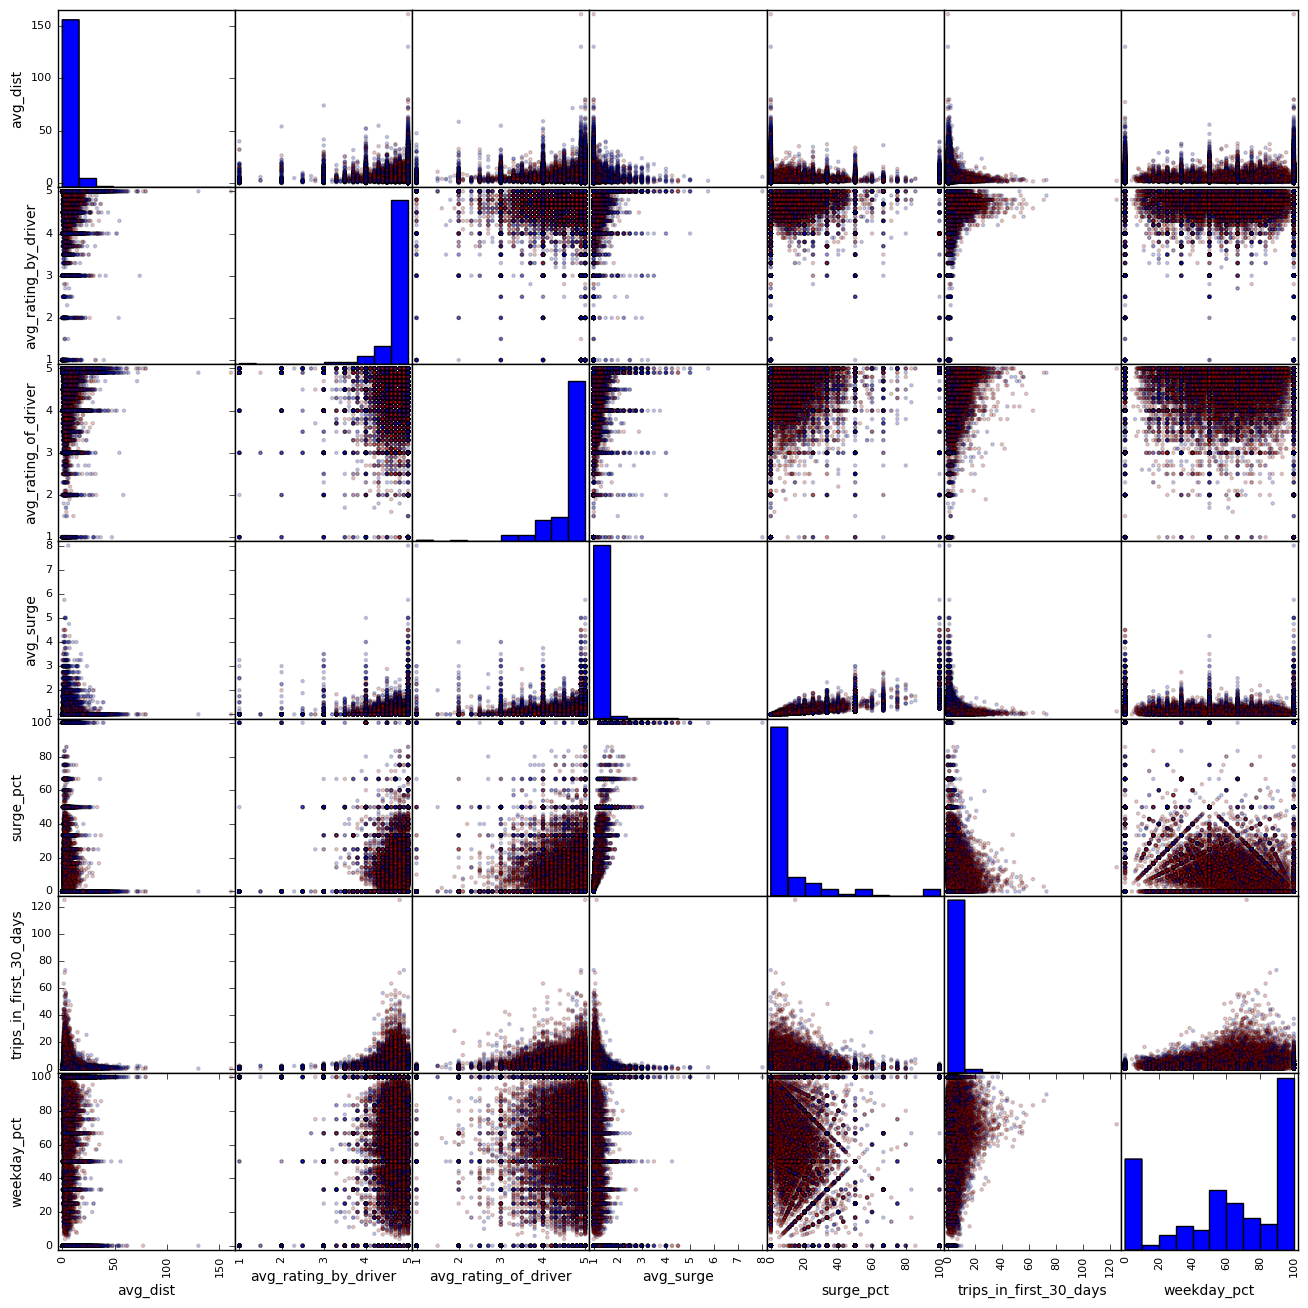

In [58]:
scatter_matrix(df[[u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', 
                  u'avg_surge', u'surge_pct', u'trips_in_first_30_days', u'weekday_pct']],
               alpha=0.2, figsize=(16, 16), diagonal='hist', c=colors)
plt.show()

### Explore churn rate split by features 

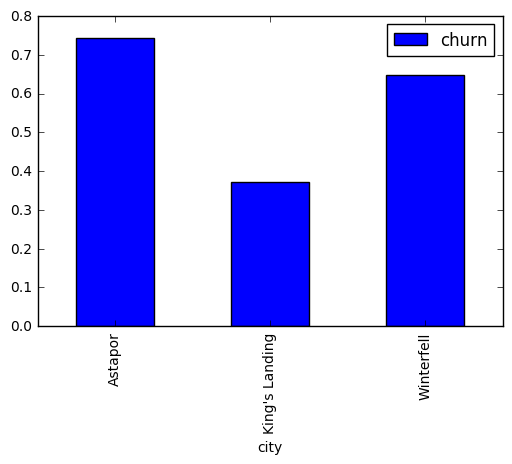

In [59]:
df[['city', 'churn']].groupby(['city']).mean().plot.bar()

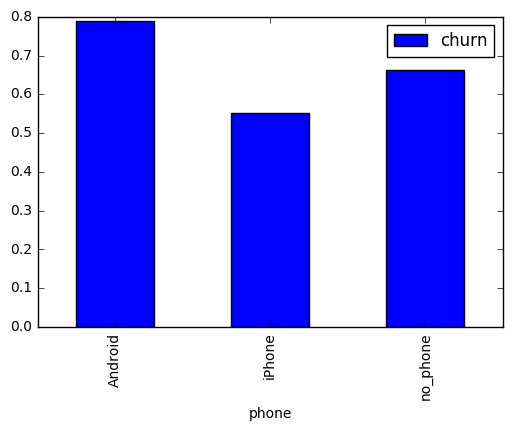

In [60]:
df[['phone', 'churn']].groupby(['phone']).mean().plot.bar()

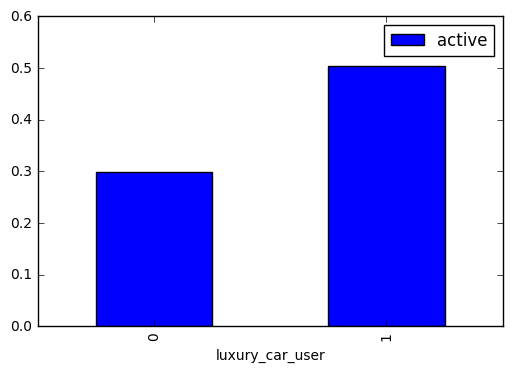

In [61]:
df[['luxury_car_user', 'active']].groupby(['luxury_car_user']).mean().plot.bar()

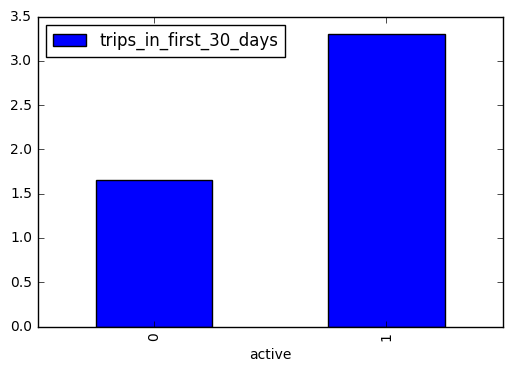

In [62]:
df[['trips_in_first_30_days', 'active']].groupby(['active']).mean().plot.bar()

In [63]:
is_active = df['active'] == 1

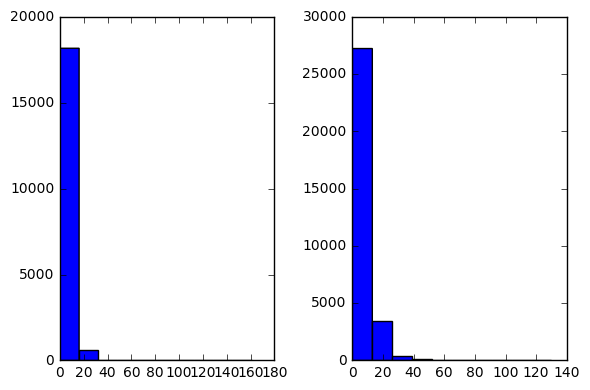

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(df[is_active]['avg_dist'].values)
axes[1].hist(df[~is_active]['avg_dist'].values)
fig.tight_layout()
plt.show()

#### Abstract out the plotting machine

In [65]:
def hist_active_vs_churn(df, col_name):
    is_active = df['active'] == 1
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].hist(df[is_active][col_name].values)
    axes[0].set_title("active users")
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel("counts")
    axes[1].hist(df[~is_active][col_name].values)
    axes[1].set_title("churned users")
    axes[1].set_xlabel(col_name)
    axes[1].set_ylabel("counts")
    fig.tight_layout()
    plt.show()

In [66]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'signup_dow', 'signup_dow_0', 'signup_dow_1', 'signup_dow_2',
       'signup_dow_3', 'signup_dow_4', 'signup_dow_5', 'signup_dow_6',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'phone_no_phone', 'churn', 'active'],
      dtype='object')

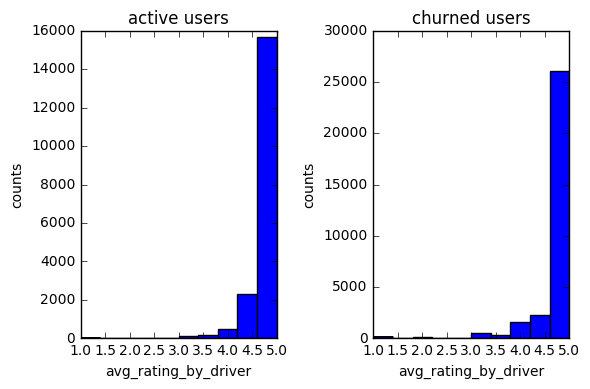

In [67]:
hist_active_vs_churn(df, col_name=u'avg_rating_by_driver')

In [68]:
cols = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge']

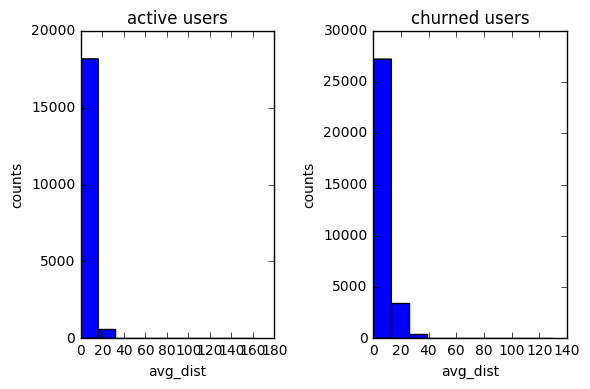

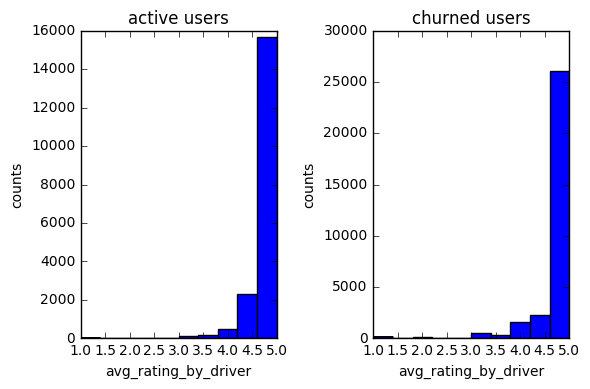

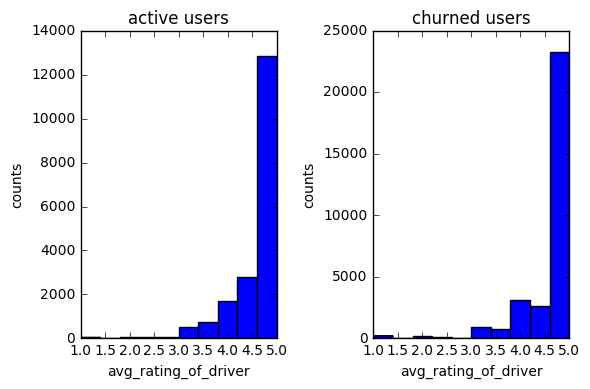

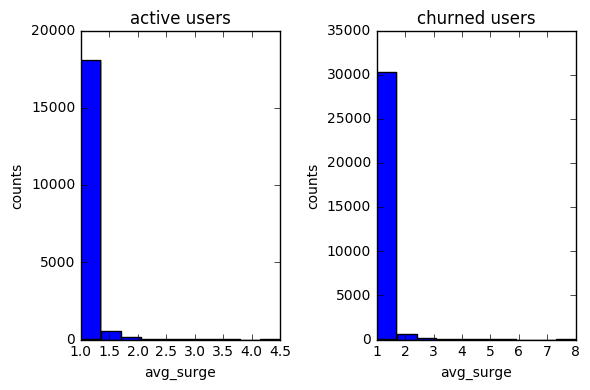

In [69]:
for col in cols:
    hist_active_vs_churn(df, col_name=col)

## Save cleaned data to csv file

### Select which columns to be saved

In [70]:
selected_columns = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone', u'signup_dow_0', 
                     u'signup_dow_1', u'signup_dow_2', u'signup_dow_3', u'signup_dow_4', 
                     u'signup_dow_5', u'signup_dow_6', u'churn']

### Save to csv file


In [71]:
cleaned_data_csv = 'data/cleaned_data.csv'
df[selected_columns].to_csv(cleaned_data_csv, index=False)

## Build Logistic Regression Model

### Reload data from cleaned csv file

In [76]:
import pandas as pd
cleaned_data_csv = 'data/cleaned_data.csv'
df = pd.read_csv(cleaned_data_csv)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

### Define Features and Target

In [80]:
selected_features = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone', u'signup_dow_0', 
                     u'signup_dow_1', u'signup_dow_2', u'signup_dow_3', u'signup_dow_4', 
                     u'signup_dow_5', u'signup_dow_6']
target = u'churn'

In [81]:
X = df[selected_features].values
y = df['churn'].values

### Use our own implementation of Logistic Regression Model

In [82]:
from my_LogisticRegression import *

In [83]:
%load_ext autoreload
%autoreload 2

In [84]:
from my_LogisticRegression import log_likelihood, log_likelihood_gradient, predict, predict_proba
from my_LogisticRegression import GradientAscent
from my_LogisticRegression import precision, accuracy, recall

In [95]:
ga = GradientAscent(cost=log_likelihood, 
                    gradient=log_likelihood_gradient, 
                    predict_func=predict,
                    fit_intercept=True)
ga.run(X, y, alpha=0.1, num_iterations=2000)

In [96]:
def plot_cost(cost_history, ax, alpha=1.0):
    """Plot the in sample cost of a gradient ascent run over time."""
    ax.plot(range(len(cost_history)), cost_history, alpha=alpha)
    ax.set_title("Logistic Regression Cost Function Over Time")
    ax.set_xlabel("Iteration Number")
    ax.set_ylabel("Cost")

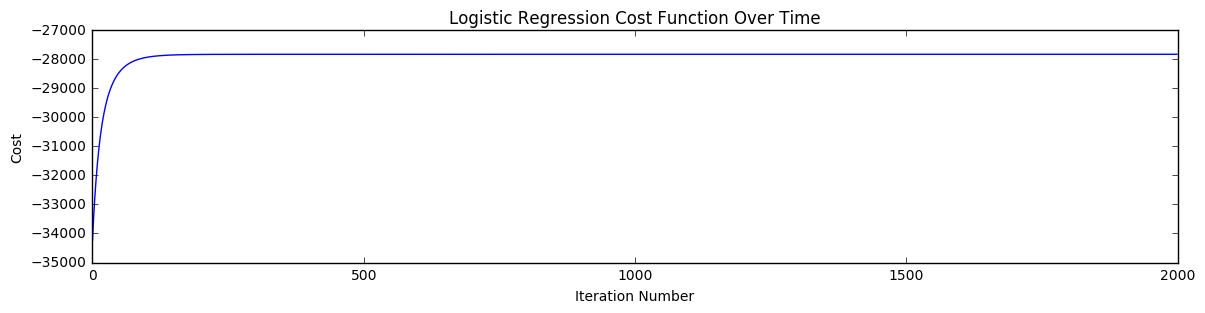

In [97]:
fig, ax = plt.subplots(1, figsize=(14, 3))

plot_cost(ga.cost_history, ax)

In [98]:
ga.cost_history[:10]

[-34235.711725321125,
 -33846.028447955941,
 -33485.627527239871,
 -33152.02724770052,
 -32842.943556383609,
 -32556.283557862094,
 -32290.135984179014,
 -32042.759799047999,
 -31812.571875466769,
 -31598.134425612956]

### Use standardized features

In [99]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [100]:
ga = GradientAscent(cost=log_likelihood, 
                    gradient=log_likelihood_gradient, 
                    predict_func=predict,
                    fit_intercept=True)
ga.run(X, y, alpha=0.1, num_iterations=5000)

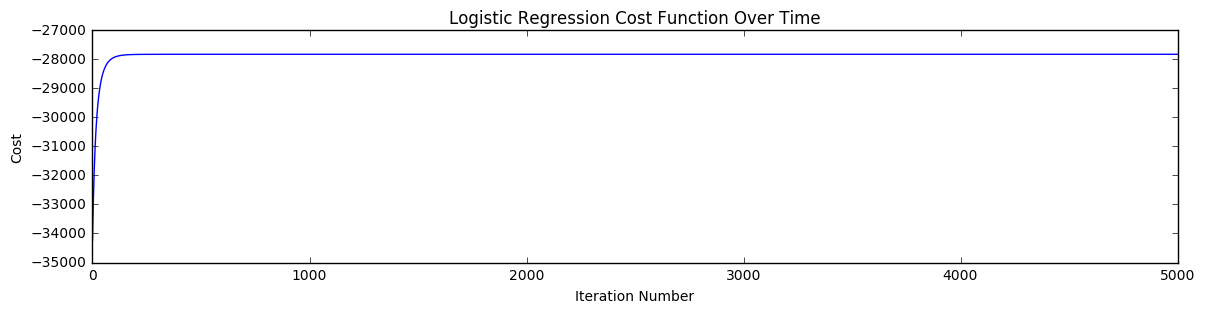

In [101]:
fig, ax = plt.subplots(1, figsize=(14, 3))

plot_cost(ga.cost_history, ax)

In [102]:
y_pred = ga.predict(X)

print("The predicted class vector is \n{}".format(str(y_pred)))
print("The actual class vector is \n{}".format(str(y)))

The predicted class vector is 
[0 1 1 ..., 1 1 1]
The actual class vector is 
[0 1 1 ..., 1 1 1]


In [103]:
print("Accuracy of the Logistic Regression is: {}".format(accuracy(y, y_pred)))
print("Precision of the Logistic Regression is: {}".format(precision(y, y_pred)))
print("Recall of the Logistic Regression is: {}".format(recall(y, y_pred)))

Accuracy of the Logistic Regression is: 0.71848
Precision of the Logistic Regression is: 0.7367911479944675
Recall of the Logistic Regression is: 0.8537953583792794


### Understanding the Estimated Coefficients

In [104]:
ga.coeffs

array([ 0.59988142,  0.20656155,  0.06882503,  0.07319855,  0.04487912,
       -0.08144446, -0.45052554, -0.42177596, -0.00110267,  0.30122346,
       -0.43507463,  0.06646648,  0.24998938, -0.24959686,  0.00745004,
       -0.00929664,  0.00819615, -0.00540098,  0.01768195,  0.02107886,
       -0.01305496, -0.02117653])

In [105]:
selected_features

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'trips_in_first_30_days',
 'luxury_car_user',
 'weekday_pct',
 'city_Astapor',
 "city_King's Landing",
 'city_Winterfell',
 'phone_Android',
 'phone_iPhone',
 'phone_no_phone',
 'signup_dow_0',
 'signup_dow_1',
 'signup_dow_2',
 'signup_dow_3',
 'signup_dow_4',
 'signup_dow_5',
 'signup_dow_6']

In [106]:
zip(selected_features, ga.coeffs)

In [107]:
df_coeffs = pd.DataFrame(list(zip(selected_features, ga.coeffs))).sort_values(by=[1], ascending=False)

In [108]:
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
0,avg_dist,0.599881
9,city_King's Landing,0.301223
12,phone_iPhone,0.249989
1,avg_rating_by_driver,0.206562
3,avg_surge,0.073199
2,avg_rating_of_driver,0.068825
11,phone_Android,0.066466
4,surge_pct,0.044879
19,signup_dow_5,0.021079
18,signup_dow_4,0.017682


In [109]:
import matplotlib.pyplot as plt
% matplotlib inline

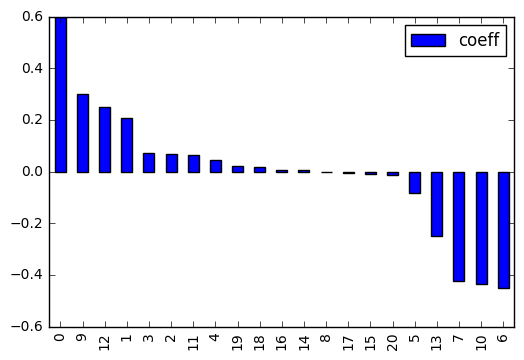

In [110]:
ax = df_coeffs.plot.bar()

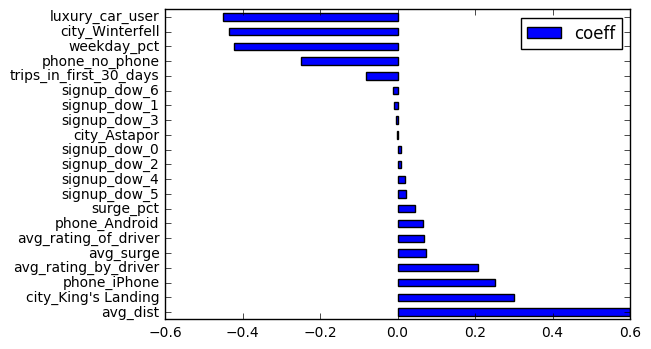

In [111]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### Interpret coefficient?

Say, for a given user, assume he has a probability to churn at 50%, or in another word, the odd ratio is 1:1 = 1

In [112]:
default_OR = 1 # 50% chance to churn

If a coefficient is 0.2, then, if we increase the corresponding variable by 1 unit, the new odd ratio will be:

In [113]:
beta = 0.2
increase = np.exp(beta)
OR = default_OR * increase
OR

1.2214027581601699

Which is can be converted to chance to churn:

In [114]:
p = OR / (1 + OR)
p

0.54983399731247795

If a coefficient is -0.4, then, if we increase the corresponding variable by 1 unit, the new odd ratio will be:

In [115]:
beta = -0.4
increase = np.exp(beta) * 1
OR = default_OR * increase
OR

0.67032004603563933

Which is can be converted to chance to churn:

In [116]:
p = OR / (1 + OR)
p

0.401312339887548

### Check the result with our EDA

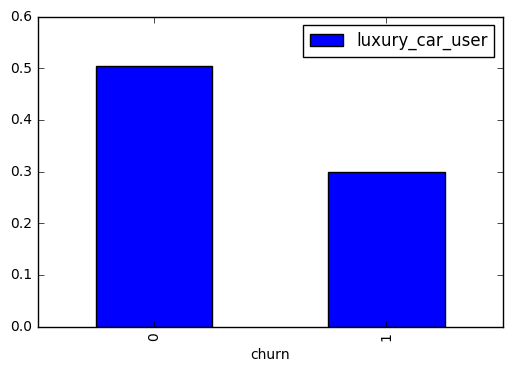

In [117]:
df[['luxury_car_user', 'churn']].groupby(['churn']).mean().plot.bar()

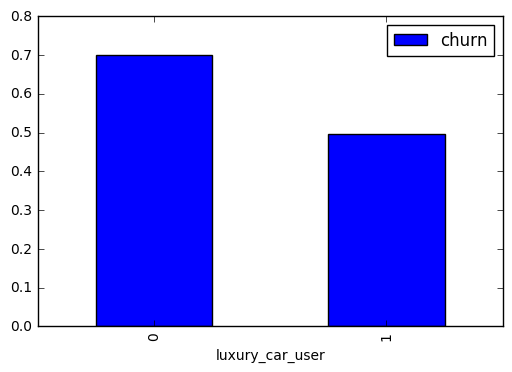

In [118]:
df[['luxury_car_user', 'churn']].groupby(['luxury_car_user']).mean().plot.bar()

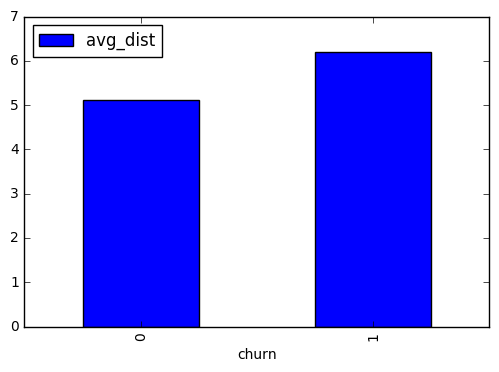

In [119]:
df[['avg_dist', 'churn']].groupby(['churn']).mean().plot.bar()

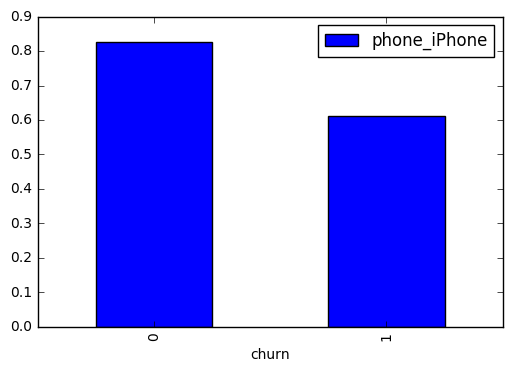

In [120]:
df[['phone_iPhone', 'churn']].groupby(['churn']).mean().plot.bar()

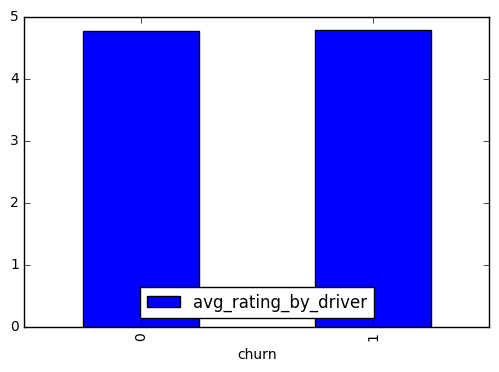

In [121]:
df[['avg_rating_by_driver', 'churn']].groupby(['churn']).mean().plot.bar()
plt.legend(loc='lower center')

### Use Logistic Regression from sklearn

In [122]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100000, fit_intercept=True)
lr.fit(X, y)

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [123]:
y_pred = lr.predict(X)
print("Accuracy of the Logistic Regression is: {}".format(accuracy(y, y_pred)))
print("Precision of the Logistic Regression is: {}".format(precision(y, y_pred)))
print("Recall of the Logistic Regression is: {}".format(recall(y, y_pred)))

Accuracy of the Logistic Regression is: 0.71848
Precision of the Logistic Regression is: 0.7367911479944675
Recall of the Logistic Regression is: 0.8537953583792794


In [124]:
df_coeffs = pd.DataFrame(list(zip(selected_features, lr.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
8,city_Astapor,0.301224
11,phone_Android,0.249989
0,avg_dist,0.206563
2,avg_rating_of_driver,0.073198
1,avg_rating_by_driver,0.068825
10,city_Winterfell,0.066467
3,avg_surge,0.044871
18,signup_dow_4,0.021079
17,signup_dow_3,0.017682
15,signup_dow_1,0.008196


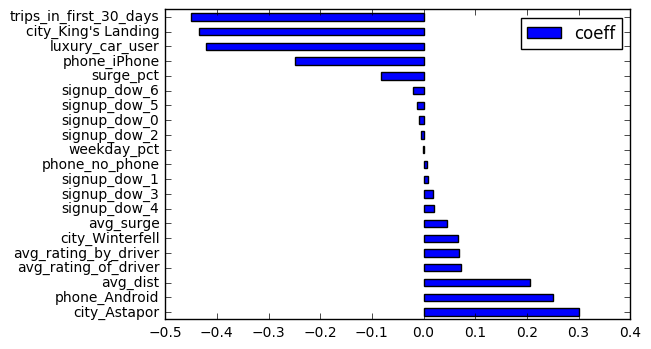

In [125]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### Use polynomial features - high orders!

In [126]:
from sklearn.preprocessing import PolynomialFeatures

In [127]:
X_poly = PolynomialFeatures(degree=2, interaction_only=True).fit_transform(X)

In [128]:
X_poly.shape

(50000, 232)

In [129]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000000, fit_intercept=True)
lr.fit(X_poly, y)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [130]:
y_pred = lr.predict(X_poly)
print("Accuracy of the Logistic Regression is: {}".format(accuracy(y, y_pred)))
print("Precision of the Logistic Regression is: {}".format(precision(y, y_pred)))
print("Recall of the Logistic Regression is: {}".format(recall(y, y_pred)))

Accuracy of the Logistic Regression is: 0.7353
Precision of the Logistic Regression is: 0.7526800033763822
Recall of the Logistic Regression is: 0.8575137838184382


### Use train and test set

In [131]:
from sklearn.cross_validation import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [135]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(35000, 21) (35000,)
(15000, 21) (15000,)


In [136]:
lr = LogisticRegression(C=0.1, fit_intercept=True)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [137]:
y_train_pred = lr.predict(X_train)
print("Training score:")
print("Accuracy of the Logistic Regression is: {}".format(accuracy(y_train, y_train_pred)))
print("Precision of the Logistic Regression is: {}".format(precision(y_train, y_train_pred)))
print("Recall of the Logistic Regression is: {}".format(recall(y_train, y_train_pred)))

Training score:
Accuracy of the Logistic Regression is: 0.7197714285714286
Precision of the Logistic Regression is: 0.7376984284074265
Recall of the Logistic Regression is: 0.8541504331484622


In [138]:
y_test_pred = lr.predict(X_test)
print("Test score:")
print("Accuracy of the Logistic Regression is: {}".format(accuracy(y_test, y_test_pred)))
print("Precision of the Logistic Regression is: {}".format(precision(y_test, y_test_pred)))
print("Recall of the Logistic Regression is: {}".format(recall(y_test, y_test_pred)))

Test score:
Accuracy of the Logistic Regression is: 0.7163333333333334
Precision of the Logistic Regression is: 0.7389033942558747
Recall of the Logistic Regression is: 0.8448661904254184


### Model Evaluation

#### Confusion Matrix

In [139]:
from sklearn.metrics import confusion_matrix

In [140]:
confusion_matrix(y_test, y_test_pred)

array([[2821, 2800],
       [1455, 7924]])

In [141]:
def plot_confusion_matrix(y_true, y_pred):
    '''
    Code from sklearn example.
    '''
    
    cm = confusion_matrix(y_true, y_pred)

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[10014  8790]
 [ 4445 26751]]


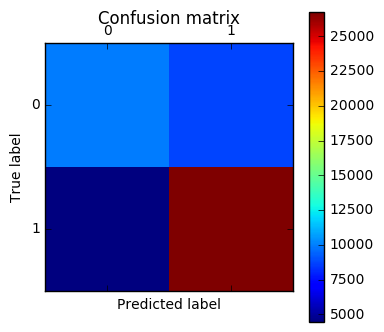

In [142]:
plot_confusion_matrix(y, y_pred)

#### classification report

In [144]:
from sklearn.metrics import classification_report
print (classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.69      0.53      0.60     18804
          1       0.75      0.86      0.80     31196

avg / total       0.73      0.74      0.73     50000



In [145]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [146]:
lr.predict_proba(X)

array([[ 0.84976306,  0.15023694],
       [ 0.06305837,  0.93694163],
       [ 0.29166287,  0.70833713],
       ..., 
       [ 0.22469365,  0.77530635],
       [ 0.29897268,  0.70102732],
       [ 0.07634397,  0.92365603]])

In [147]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

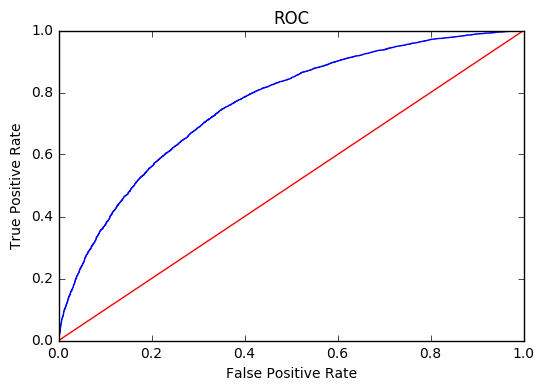

In [148]:
plt.plot(fpr, tpr)

# 45 degree line
xx = np.linspace(0, 1.0, 20)
plt.plot(xx, xx, color='red')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")

plt.show()

In [149]:
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_train, y_train_pred)))

Area Under Curve (AUC) of the Logistic Regression is: 0.6757667131986717


#### Recall-Precision Curve

In [150]:
prec, rec, thresholds = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])

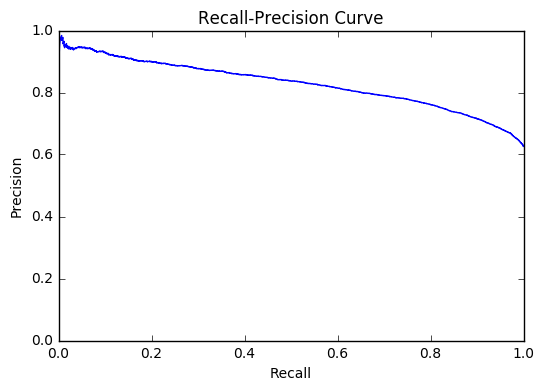

In [151]:
plt.plot(rec, prec)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")

plt.show()

### Profit Curve

In [204]:
def standard_confusion_matrix(y_true, y_predict):
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_predict)
    return np.array([[tp, fp], [fn, tn]])

def profit_curve(cost_benefit_matrix, probabilities, y_true):
    thresholds = sorted(probabilities, reverse=True)
    profits = []
    for threshold in thresholds:
        y_predict = probabilities > threshold
        confusion_mat = standard_confusion_matrix(y_true, y_predict)
        profit = np.sum(confusion_mat * cost_benefit_matrix) / float(len(y_true))
        profits.append(profit)
    return thresholds, profits

def run_profit_curve(model, costbenefit, X_train, X_test, y_train, y_test):
    probabilities = model.predict_proba(X_test)[:, 1]
    thresholds, profits = profit_curve(costbenefit, probabilities, y_test)
    return thresholds, profits

def plot_profit_model(model, costbenefit, X_train, X_test, y_train, y_test):
    percentages = np.linspace(0, 100, len(y_test))
    thresholds, profits = run_profit_curve(model,
                                           costbenefit,
                                           X_train, X_test,
                                           y_train, y_test)
    plt.plot(percentages, profits, label=model.__class__.__name__)
    plt.title("Profit Curve")
    plt.xlabel("Percentage of test instances (decreasing by score)")
    plt.ylabel("Profit")
    plt.legend(loc='best')
    plt.savefig('profit_curve.png')
    plt.show()
    
def find_best_threshold(model, costbenefit, X_train, X_test, y_train, y_test):
    max_threshold = 0
    max_profit = 0

    thresholds, profits = run_profit_curve(model, costbenefit,
                                           X_train, X_test,
                                           y_train, y_test)
    max_index = np.argmax(profits)
    if profits[max_index] > max_profit:
        max_threshold = thresholds[max_index]
        max_profit = profits[max_index]
    return max_threshold, max_profit

#### Train-test split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

#### Build model

In [206]:
lr = LogisticRegression(C=0.1, fit_intercept=True)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [207]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [208]:
y_train_pred = lr.predict(X_train)
print("Training score:")
print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_train, y_train_pred)))
print("Precision of the Logistic Regression is: {}".format(precision_score(y_train, y_train_pred)))
print("Recall of the Logistic Regression is: {}".format(recall_score(y_train, y_train_pred)))
print("f1-score of the Logistic Regression is: {}".format(f1_score(y_train, y_train_pred)))
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_train, y_train_pred)))

Training score:
Accuracy of the Logistic Regression is: 0.7193052631578948
Precision of the Logistic Regression is: 0.7375101898218237
Recall of the Logistic Regression is: 0.8543964383284428
f1-score of the Logistic Regression is: 0.7916621091613669
Area Under Curve (AUC) of the Logistic Regression is: 0.6746633471682548


In [209]:
y_test_pred = lr.predict(X_test)
print("Test score:")
print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_test, y_test_pred)))
print("Precision of the Logistic Regression is: {}".format(precision_score(y_test, y_test_pred)))
print("Recall of the Logistic Regression is: {}".format(recall_score(y_test, y_test_pred)))
print("f1-score of the Logistic Regression is: {}".format(f1_score(y_test, y_test_pred)))
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_test, y_test_pred)))

Test score:
Accuracy of the Logistic Regression is: 0.706
Precision of the Logistic Regression is: 0.7268156424581006
Recall of the Logistic Regression is: 0.8409825468648998
f1-score of the Logistic Regression is: 0.779742283488163
Area Under Curve (AUC) of the Logistic Regression is: 0.6639330362865947


#### Define cost-benefit matrix based on business input

In [210]:
costbenefit = np.array([[20, -20], [0, 0]])
costbenefit

array([[ 20, -20],
       [  0,   0]])

#### Plot profit curve 

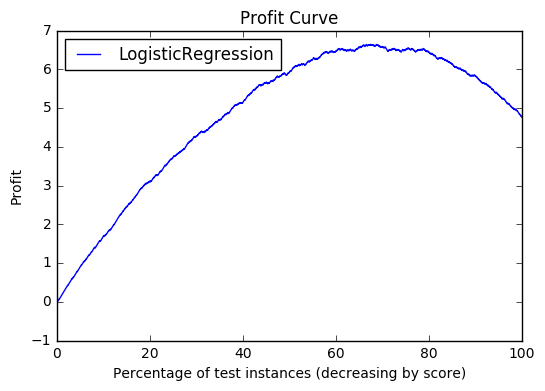

In [201]:
plot_profit_model(lr, costbenefit, X_train, X_test, y_train, y_test)

In [211]:
max_threshold, max_profit = find_best_threshold(lr, costbenefit, X_train, X_test, y_train, y_test)

#### Find the best threshold

In [212]:
print("The best threshold is {}, which gives a max profit of {}".format(max_threshold, max_profit))

The best threshold is 0.5511737718185242, which gives a max profit of 6.64


#### Make predictions on new threshold

In [213]:
y_test_pred = (lr.predict_proba(X_test)[:,1] >= max_threshold).astype(int)
print("Test score:")
print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_test, y_test_pred)))
print("Precision of the Logistic Regression is: {}".format(precision_score(y_test, y_test_pred)))
print("Recall of the Logistic Regression is: {}".format(recall_score(y_test, y_test_pred)))
print("f1-score of the Logistic Regression is: {}".format(f1_score(y_test, y_test_pred)))
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_test, y_test_pred)))

Test score:
Accuracy of the Logistic Regression is: 0.7128
Precision of the Logistic Regression is: 0.7492483463619964
Recall of the Logistic Regression is: 0.8054298642533937
f1-score of the Logistic Regression is: 0.7763239875389409
Area Under Curve (AUC) of the Logistic Regression is: 0.6839321409409674
